1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between 
salary and experience with  experience in x-axis and salary in y axis.  
a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph 
between beta and mean squared error(MSE) for each case.  
b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between 
beta and mean squared error(MSE).  
c. Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between 
beta and mean squared error(MSE). 
d. Use the scikit learn and compare the results of MSE.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv("Salary_Data.csv")   # replace with actual CSV path
X = df["YearsExperience"].values
y = df["Salary"].values

# ==============================
# Part (a) - Fixed intercept, check MSE for slopes
# ==============================
b = 1.1   # fixed intercept
betas = [0.1, 1.5, 0.8]

for beta in betas:
    y_pred = beta * X + b
    mse = mean_squared_error(y, y_pred)
    print(f"Slope={beta}, Intercept={b}, MSE={mse:.4f}")

    # Plot actual vs predicted
    plt.scatter(X, y, color="blue", label="Actual")
    plt.plot(X, y_pred, color="red", label=f"Pred (β={beta})")
    plt.title(f"Slope={beta}, Intercept={b}, MSE={mse:.2f}")
    plt.xlabel("Experience (Years)")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

# ==============================
# Part (b) - Beta range [0,1.5], step 0.01 with fixed intercept
# ==============================
b = 1.1
betas = np.arange(0, 1.51, 0.01)
mses = []

for beta in betas:
    y_pred = beta * X + b
    mses.append(mean_squared_error(y, y_pred))

plt.plot(betas, mses, color="green")
plt.xlabel("Beta (slope)")
plt.ylabel("MSE")
plt.title("MSE vs Beta (fixed intercept=1.1)")
plt.show()

# ==============================
# Part (c) - Try intercept variation along with slope
# ==============================
betas = np.arange(0, 1.51, 0.01)
intercepts = np.arange(0, 1.51, 0.01)

# Example: vary intercept with slope (1-to-1 mapping just for experiment)
mses = []
for beta, b in zip(betas, intercepts):
    y_pred = beta * X + b
    mses.append(mean_squared_error(y, y_pred))

plt.plot(betas, mses, color="purple")
plt.xlabel("Beta (slope)")
plt.ylabel("MSE")
plt.title("MSE vs Beta with varying intercept")
plt.show()

# ==============================
# Part (d) - Using scikit-learn
# ==============================
X_reshaped = X.reshape(-1, 1)  # sklearn needs 2D input
model = LinearRegression()
model.fit(X_reshaped, y)
y_pred = model.predict(X_reshaped)

mse = mean_squared_error(y, y_pred)
print(f"Scikit-Learn -> Slope={model.coef_[0]:.4f}, Intercept={model.intercept_:.4f}, MSE={mse:.4f}")

# Plot
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", label="Best Fit")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()


2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 
and error for 60 iterations of 5 epochs.  
a. Plot the graph of log loss/error versus iteration.   
b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs. 
c. Plot the graph between beta (X-axis)  and log loss/ error (Y-axis)  using scikit learn and your approach separately.   
d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of both cases.

SGD Results: B0=-0.0213, B1=0.0325, Final Loss=0.7053


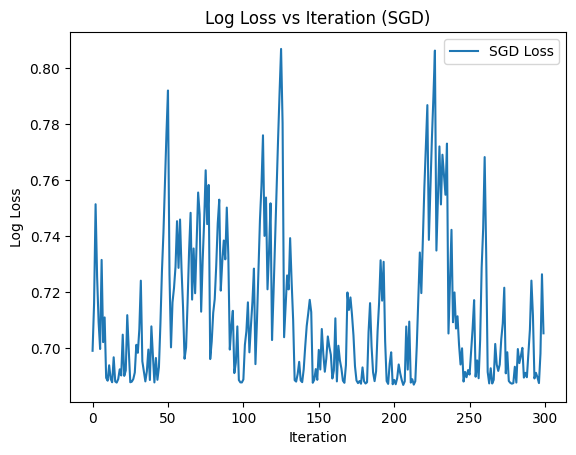

Scikit-learn Results: B0=-0.4148, B1=0.0276, Loss=0.6835


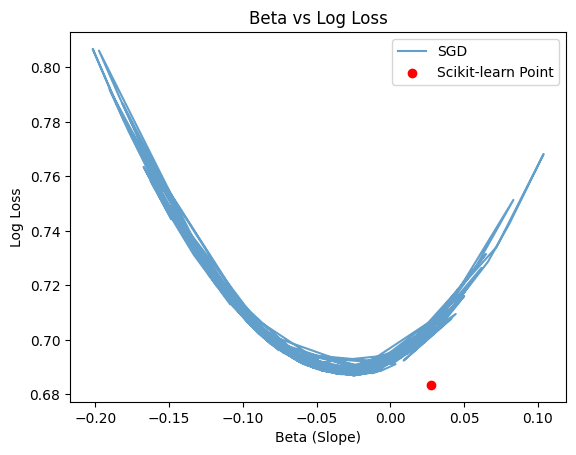

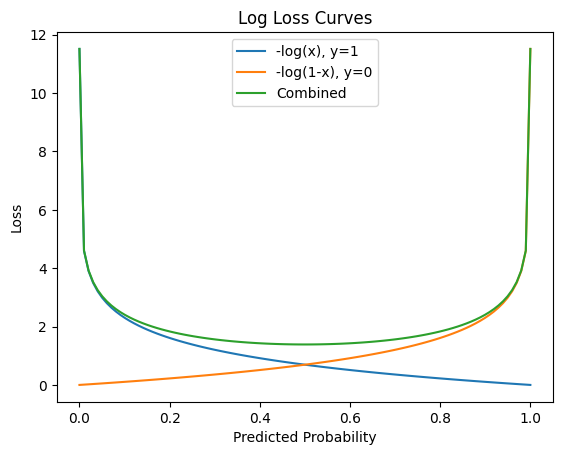

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# 
X = df["YearsExperience"].values.reshape(-1, 1)
y = df["Is_High_sal"].values  # Binary target (0 or 1)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ==============================
# Logistic Regression with SGD
# ==============================
np.random.seed(42)
B0, B1 = 0.0, 0.0   # initialize
alpha = 0.01        # learning rate
epochs = 5
iters_per_epoch = 60
losses = []
B0_values, B1_values = [], []

m = len(X)

for epoch in range(epochs):
    for i in range(iters_per_epoch):
        # Pick one random sample (SGD)
        idx = np.random.randint(0, m)
        xi, yi = X[idx][0], y[idx]
        
        # Prediction
        z = B0 + B1 * xi
        y_hat = sigmoid(z)
        
        # Gradients
        grad_B0 = (y_hat - yi)
        grad_B1 = (y_hat - yi) * xi
        
        # Update
        B0 -= alpha * grad_B0
        B1 -= alpha * grad_B1
        
        # Compute log loss over whole dataset
        y_pred_all = sigmoid(B0 + B1 * X.flatten())
        loss = log_loss(y, y_pred_all)
        
        losses.append(loss)
        B0_values.append(B0)
        B1_values.append(B1)

print(f"SGD Results: B0={B0:.4f}, B1={B1:.4f}, Final Loss={losses[-1]:.4f}")

# ==============================
# (a) Plot Error vs Iteration
# ==============================
plt.plot(range(len(losses)), losses, label="SGD Loss")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Iteration (SGD)")
plt.legend()
plt.show()

# ==============================
# (b) Scikit-learn Logistic Regression
# ==============================
clf = LogisticRegression(solver="saga", max_iter=3000)
clf.fit(X, y)
y_pred = clf.predict_proba(X)[:,1]
sklearn_loss = log_loss(y, y_pred)

print(f"Scikit-learn Results: B0={clf.intercept_[0]:.4f}, B1={clf.coef_[0][0]:.4f}, Loss={sklearn_loss:.4f}")

# ==============================
# (c) Beta vs Loss Comparison
# ==============================
plt.plot(B1_values, losses, label="SGD", alpha=0.7)
plt.scatter([clf.coef_[0][0]], [sklearn_loss], color="red", label="Scikit-learn Point")
plt.xlabel("Beta (Slope)")
plt.ylabel("Log Loss")
plt.title("Beta vs Log Loss")
plt.legend()
plt.show()

# ==============================
# (d) Plot log loss curves
# ==============================
x = np.linspace(1e-5, 0.99999, 100)
loss_y1 = -np.log(x)         # case y=1
loss_y0 = -np.log(1-x)       # case y=0

plt.plot(x, loss_y1, label="-log(x), y=1")
plt.plot(x, loss_y0, label="-log(1-x), y=0")
plt.plot(x, loss_y1 + loss_y0, label="Combined")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Log Loss Curves")
plt.legend()
plt.show()


3. Consider positive and negative slope dataset given below. Apply simple linear regression with gradient 
descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph 
of slope(x-axis) vs  MSE (y-axis) for both case separately.  
x = np.array([1, 2, 4, 3, 5]) 
y = np.array([1, 3, 3, 2, 5])  # Positive slope 
 
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([10, 8, 6, 4, 2])  # Negative slope

Positive slope dataset: Final B0=0.2819, B1=0.8327
Negative slope dataset: Final B0=3.6901, B1=0.3017


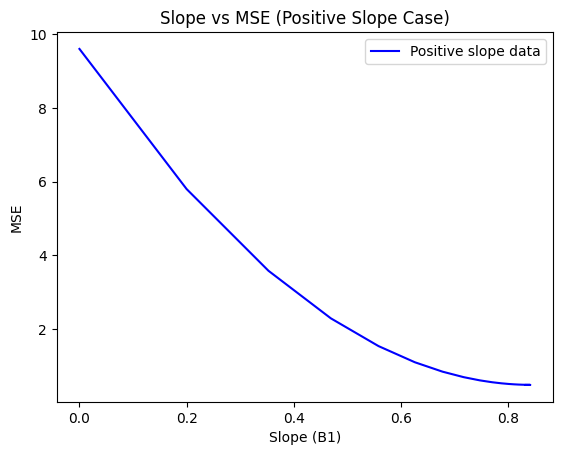

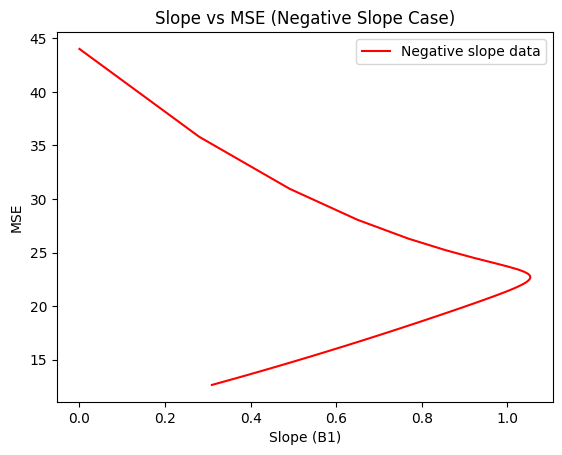

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Gradient Descent Function
# =========================
def gradient_descent(x, y, alpha=0.01, iterations=100):
    n = len(x)
    B0, B1 = 0, 0  # initialize
    slopes, mses = [], []
    
    for i in range(iterations):
        y_pred = B0 + B1 * x
        error = y - y_pred
        mse = np.mean(error**2)
        
        # Store slope and mse
        slopes.append(B1)
        mses.append(mse)
        
        # Gradients
        dB0 = -(2/n) * np.sum(error)
        dB1 = -(2/n) * np.sum(x * error)
        
        # Update
        B0 -= alpha * dB0
        B1 -= alpha * dB1
    
    return slopes, mses, B0, B1

# =========================
# Positive slope dataset
# =========================
x1 = np.array([1, 2, 4, 3, 5])
y1 = np.array([1, 3, 3, 2, 5])
slopes_pos, mses_pos, B0_pos, B1_pos = gradient_descent(x1, y1, alpha=0.01, iterations=100)

print(f"Positive slope dataset: Final B0={B0_pos:.4f}, B1={B1_pos:.4f}")

# =========================
# Negative slope dataset
# =========================
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([10, 8, 6, 4, 2])
slopes_neg, mses_neg, B0_neg, B1_neg = gradient_descent(x2, y2, alpha=0.01, iterations=100)

print(f"Negative slope dataset: Final B0={B0_neg:.4f}, B1={B1_neg:.4f}")

# =========================
# Plotting slope vs MSE
# =========================
plt.plot(slopes_pos, mses_pos, label="Positive slope data", color="blue")
plt.xlabel("Slope (B1)")
plt.ylabel("MSE")
plt.title("Slope vs MSE (Positive Slope Case)")
plt.legend()
plt.show()

plt.plot(slopes_neg, mses_neg, label="Negative slope data", color="red")
plt.xlabel("Slope (B1)")
plt.ylabel("MSE")
plt.title("Slope vs MSE (Negative Slope Case)")
plt.legend()
plt.show()


4. Consider positive and negative slope dataset given below. Apply  logistic regression with gradient descent and 
illustrate the difference between slope values for both cases at different iterations. Plot the graph of slope(x-
axis) vs  log-loss (y-axis) for both case separately.  
 
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([0, 0, 1, 1, 1])  # Positive slope 
 
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([1, 1, 0, 0, 0])  # Negative slope

Positive slope: Final B0=-1.1127, B1=0.7222, Loss=0.3859
Negative slope: Final B0=1.1127, B1=-0.7222, Loss=0.3859


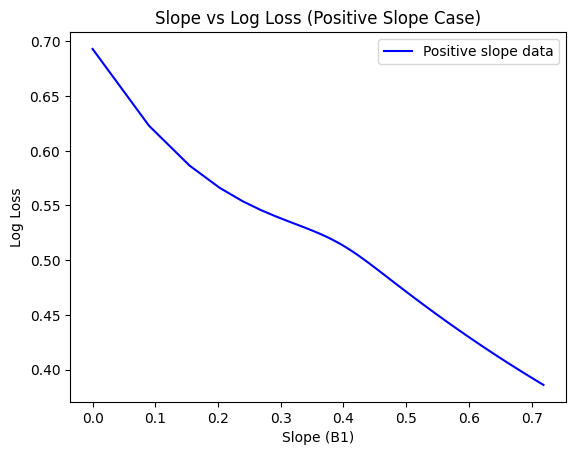

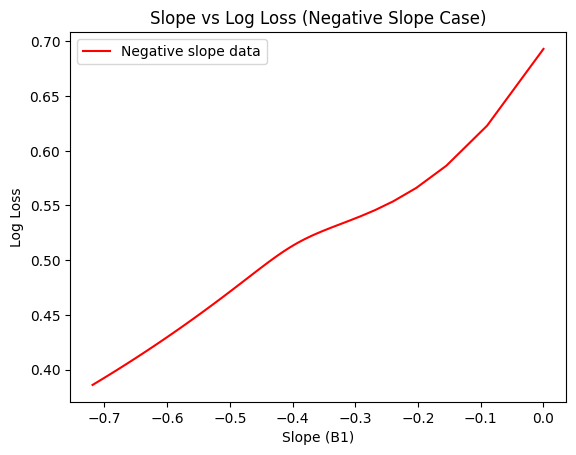

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression with Gradient Descent
def logistic_gd(x, y, alpha=0.1, iterations=100):
    n = len(x)
    B0, B1 = 0.0, 0.0  # initialize
    slopes, losses = [], []

    for i in range(iterations):
        z = B0 + B1 * x
        y_hat = sigmoid(z)
        
        # Log loss
        loss = -(1/n) * np.sum(y*np.log(y_hat + 1e-10) + (1-y)*np.log(1-y_hat + 1e-10))
        
        # Store values
        slopes.append(B1)
        losses.append(loss)
        
        # Gradients
        dB0 = (1/n) * np.sum(y_hat - y)
        dB1 = (1/n) * np.sum((y_hat - y) * x)
        
        # Update parameters
        B0 -= alpha * dB0
        B1 -= alpha * dB1
    
    return slopes, losses, B0, B1

# =============================
# Positive slope dataset
# =============================
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([0, 0, 1, 1, 1])
slopes_pos, losses_pos, B0_pos, B1_pos = logistic_gd(x1, y1, alpha=0.1, iterations=100)
print(f"Positive slope: Final B0={B0_pos:.4f}, B1={B1_pos:.4f}, Loss={losses_pos[-1]:.4f}")

# =============================
# Negative slope dataset
# =============================
x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([1, 1, 0, 0, 0])
slopes_neg, losses_neg, B0_neg, B1_neg = logistic_gd(x2, y2, alpha=0.1, iterations=100)
print(f"Negative slope: Final B0={B0_neg:.4f}, B1={B1_neg:.4f}, Loss={losses_neg[-1]:.4f}")

# =============================
# Plotting slope vs log-loss
# =============================
plt.plot(slopes_pos, losses_pos, color="blue", label="Positive slope data")
plt.xlabel("Slope (B1)")
plt.ylabel("Log Loss")
plt.title("Slope vs Log Loss (Positive Slope Case)")
plt.legend()
plt.show()

plt.plot(slopes_neg, losses_neg, color="red", label="Negative slope data")
plt.xlabel("Slope (B1)")
plt.ylabel("Log Loss")
plt.title("Slope vs Log Loss (Negative Slope Case)")
plt.legend()
plt.show()
